# Exploratory Data Analysis

In this notebook, we will delve into the dataset to get insights before progress to the modelling process.

## Importing Libaries and Loading Dataset

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [90]:
# load the dataset
df = pd.read_csv('/home/er_bim/productivity-prediction/notebooks/data/worker_productivity_processed.csv')

In [91]:
# alter the date type of column 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

## Univariate Analysis

### Distribution Plot with Histogram

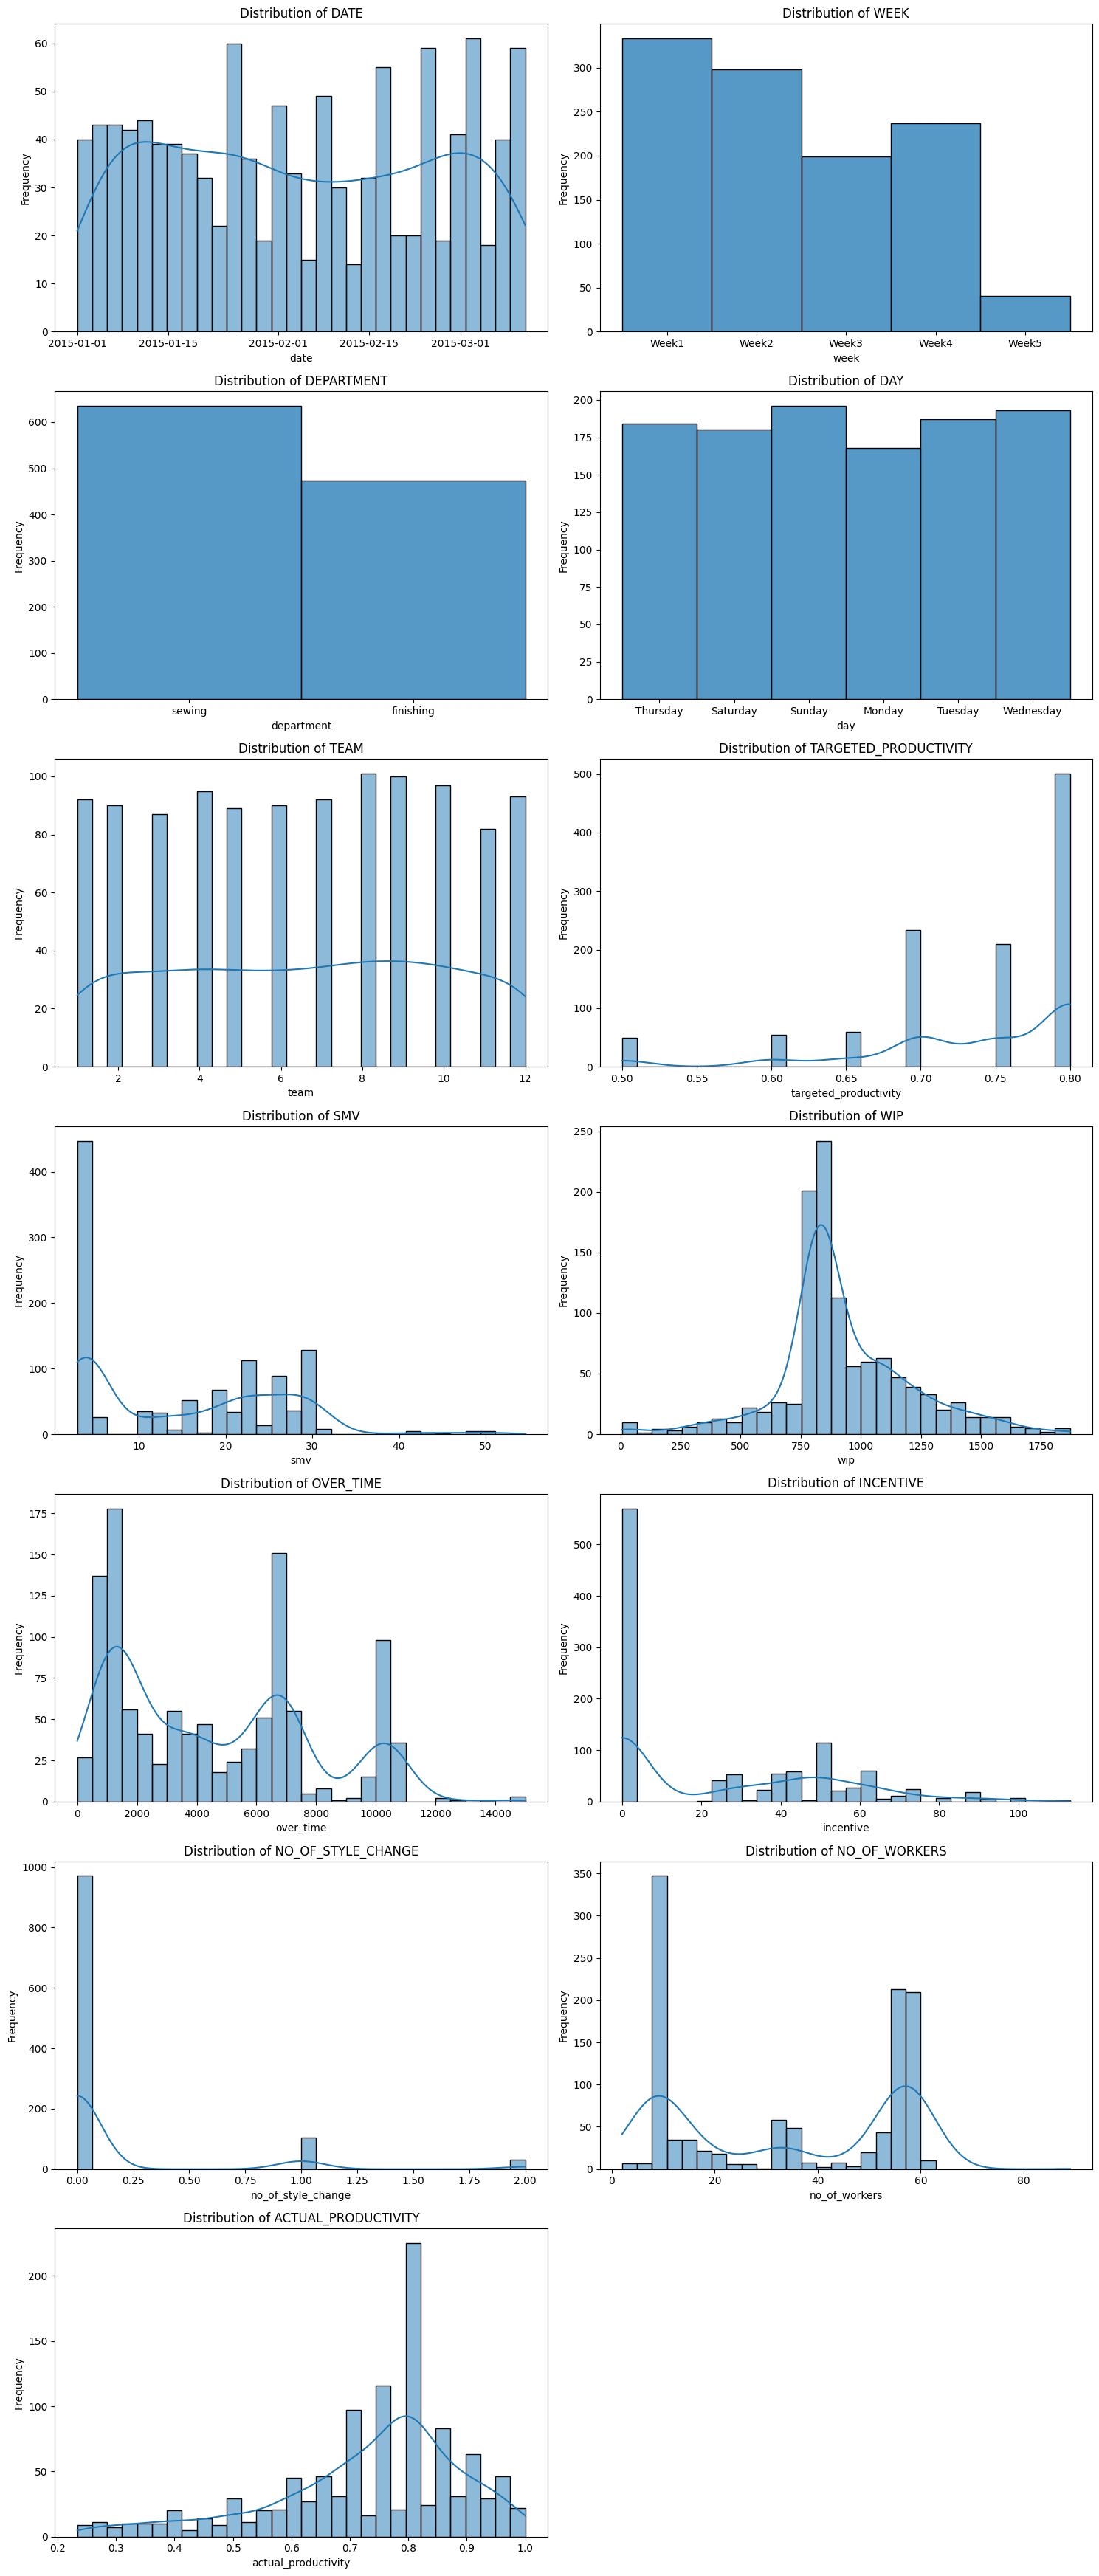

In [92]:
# Identify all columns
columns = df.columns

# Create subplots with 2 columns
num_columns = 2
num_rows = (len(columns) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a histogram for each
for i, col in enumerate(columns):
    ax = axes[i]
    if df[col].dtype == object:
        sns.histplot(df[col], bins=30, kde=False, ax=ax)
    else:
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
    
    ax.set_title(f"Distribution of {str(col).upper()}")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Column Value Trend with Line Plot

#### Over the Historical Time

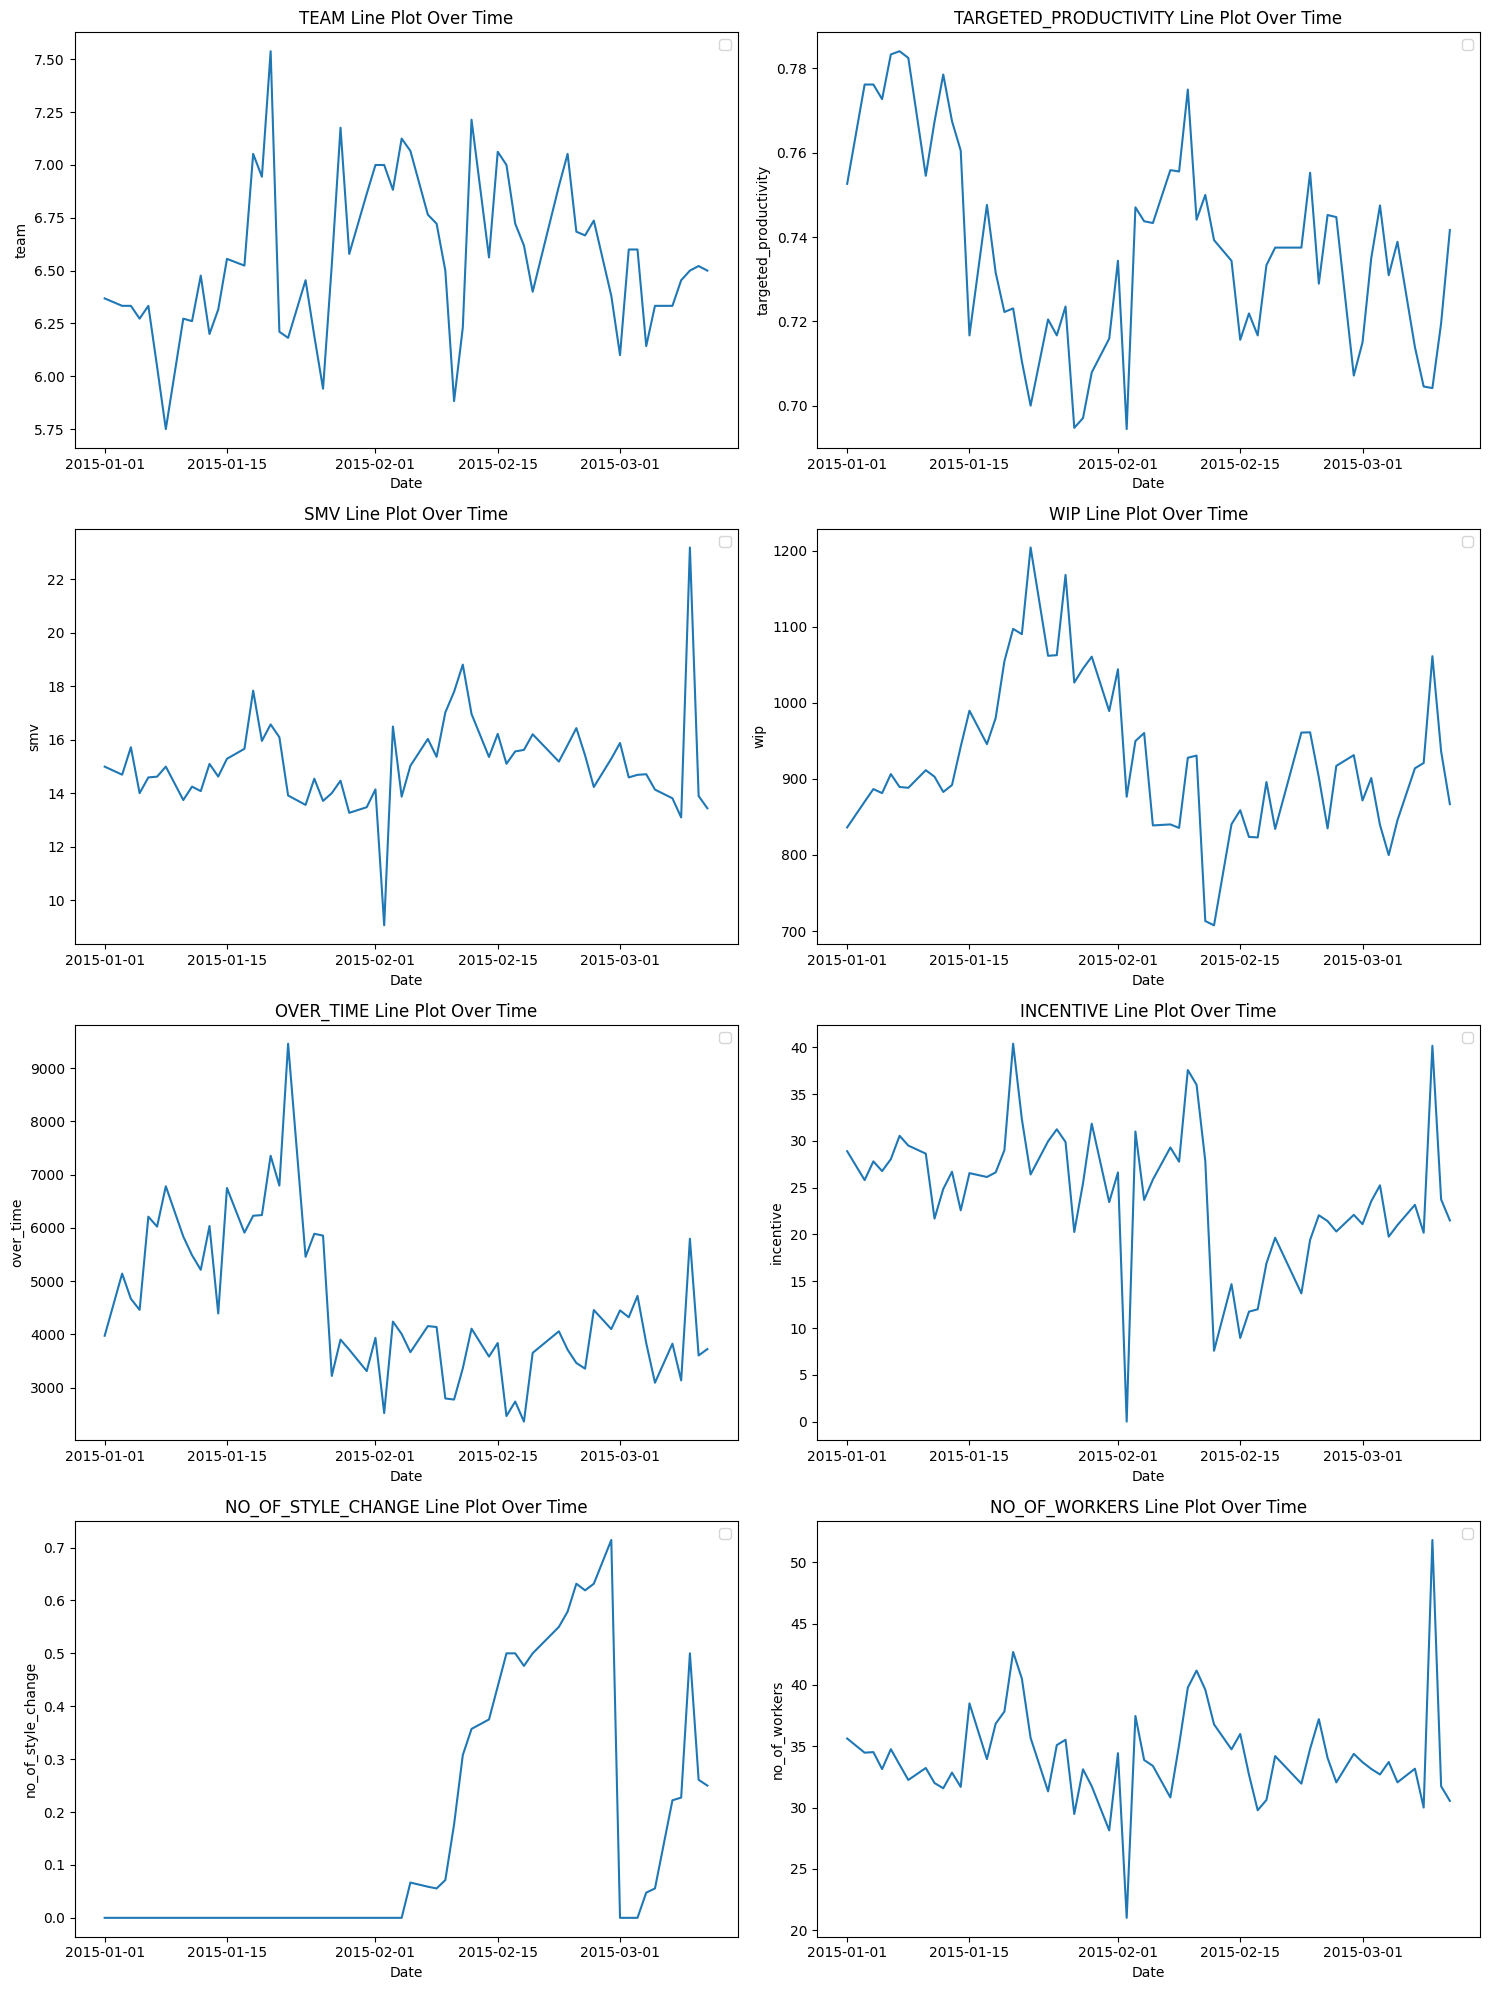

In [93]:
# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='date', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot Over Time")
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### By Weeks

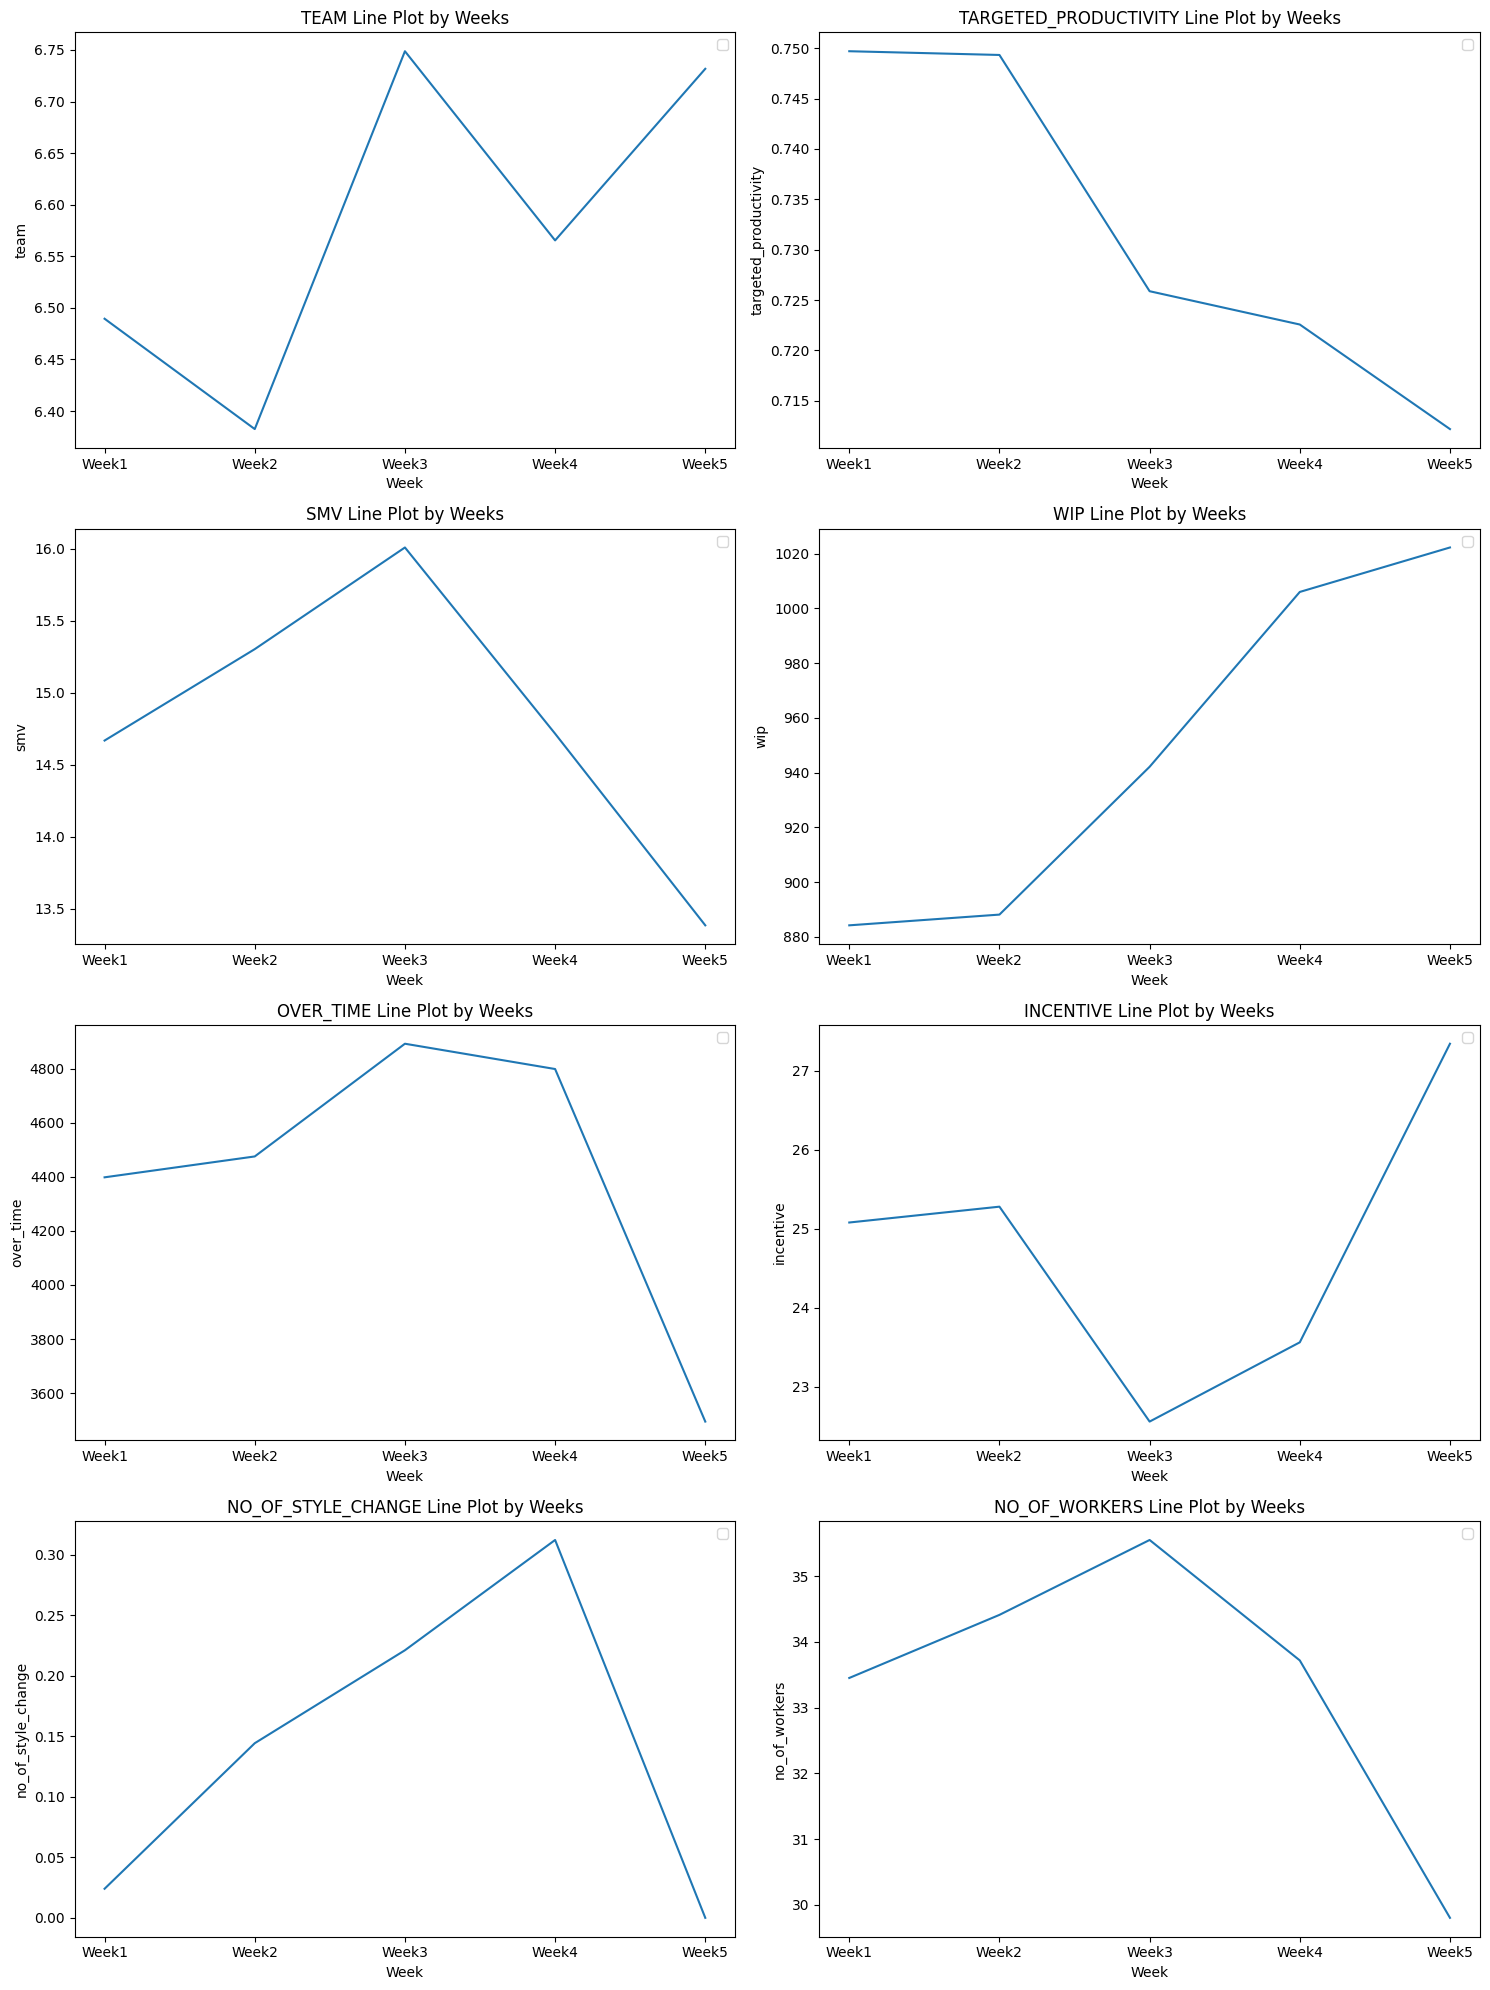

In [94]:
# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='week', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot by Weeks")
    ax.set_xlabel('Week')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### By Days

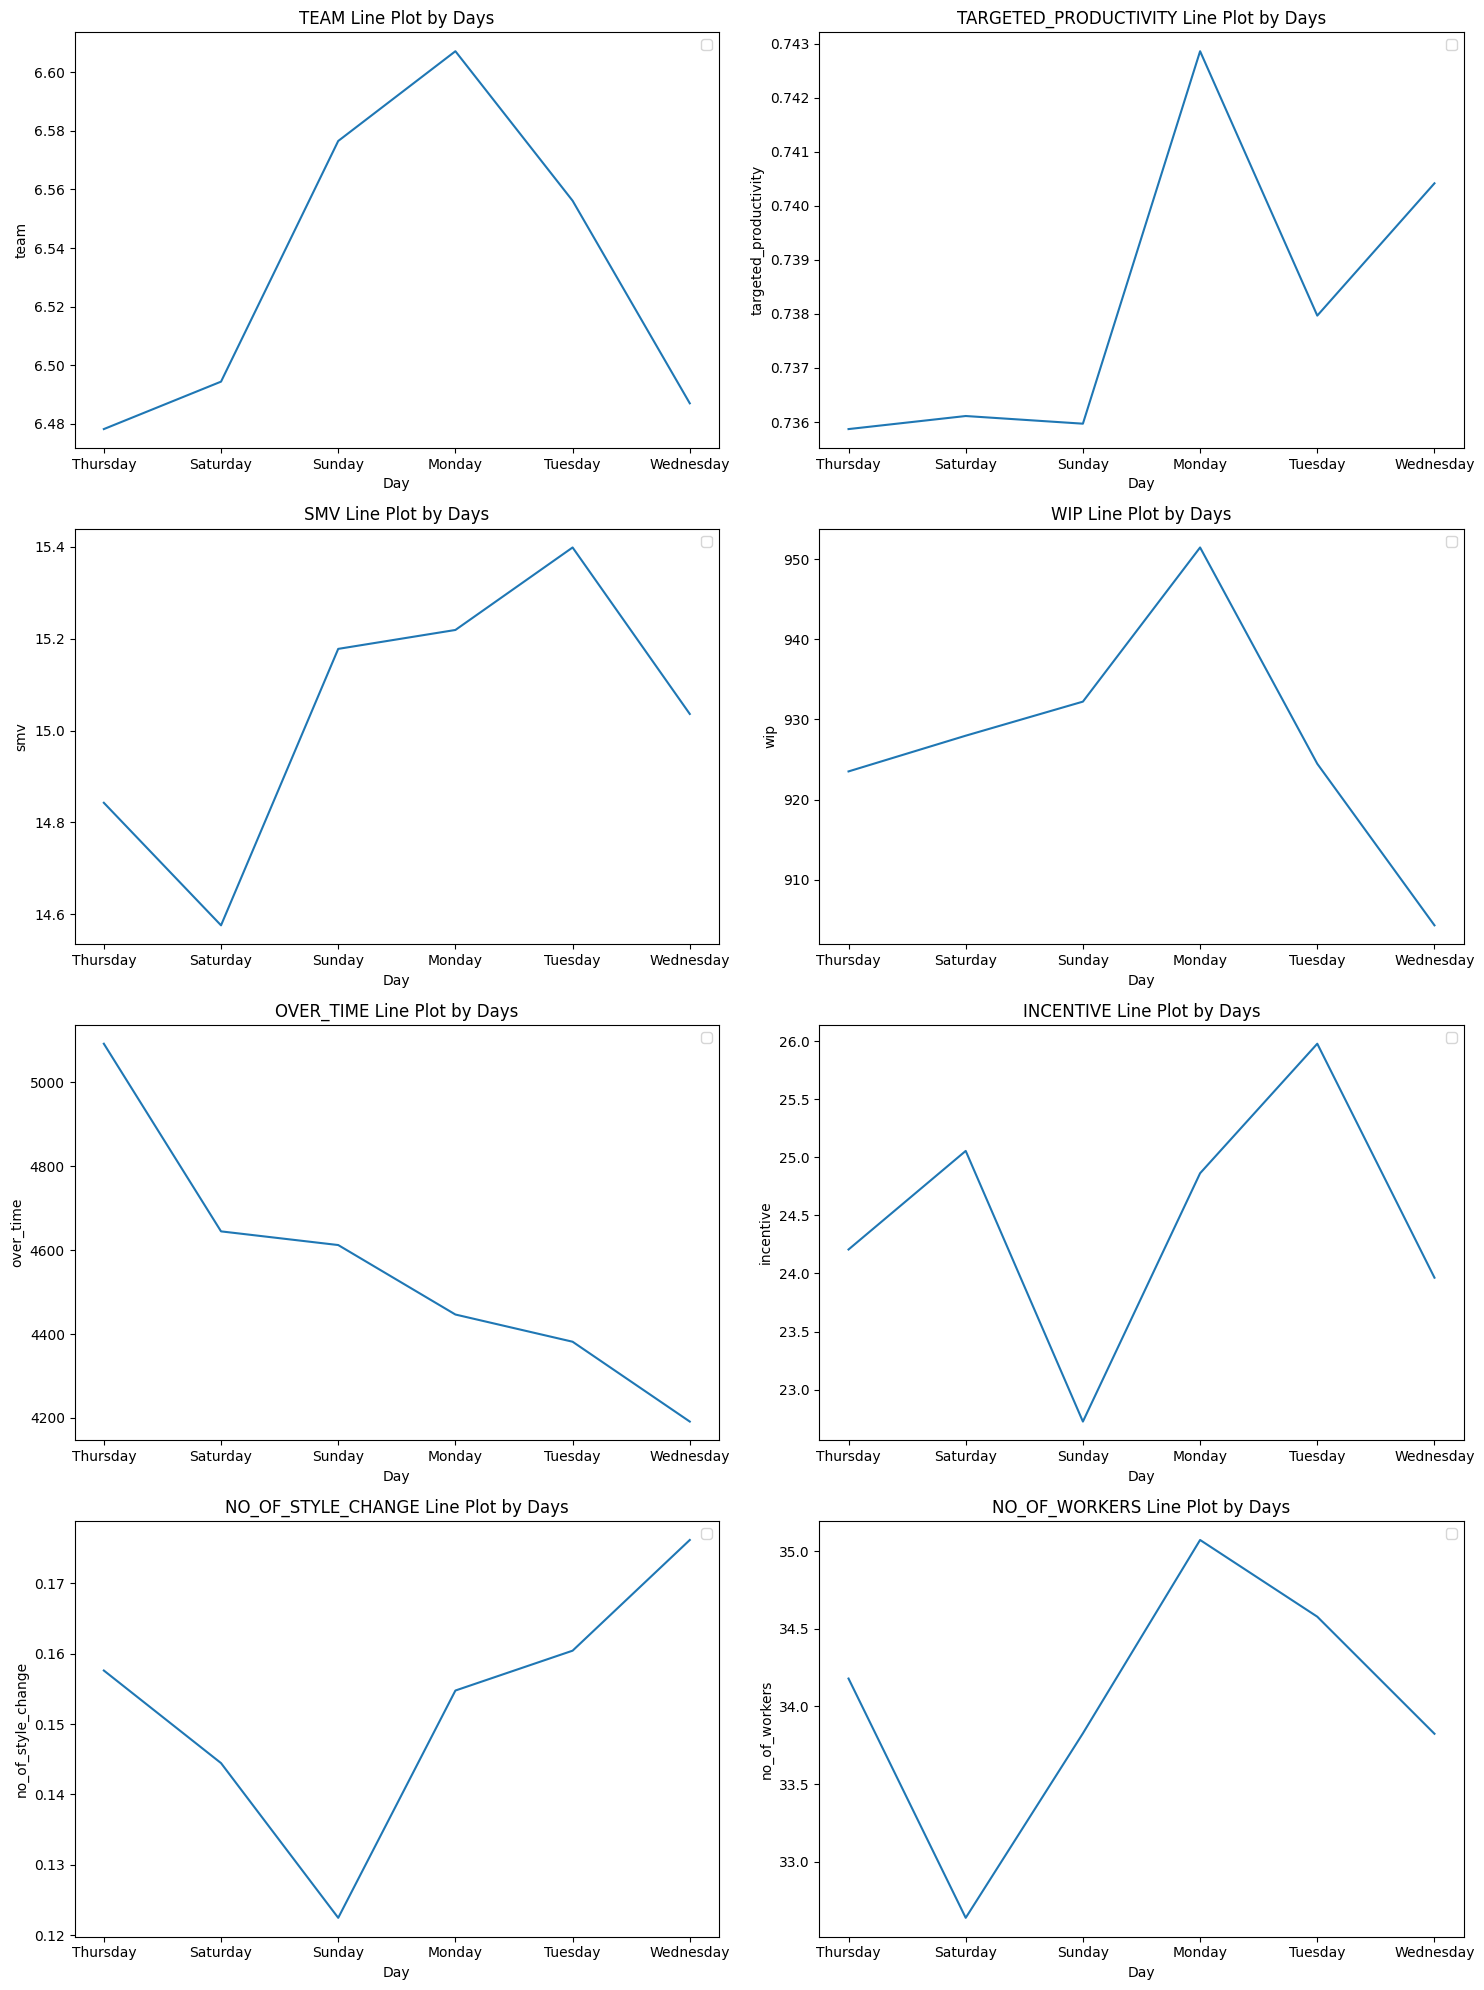

In [95]:
# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.lineplot(data=df, x='day', y=col, ci=None, ax=ax)
    ax.set_title(f"{str(col).upper()} Line Plot by Days")
    ax.set_xlabel('Day')
    ax.set_ylabel(col)
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical Predictors vs Actual Productivity

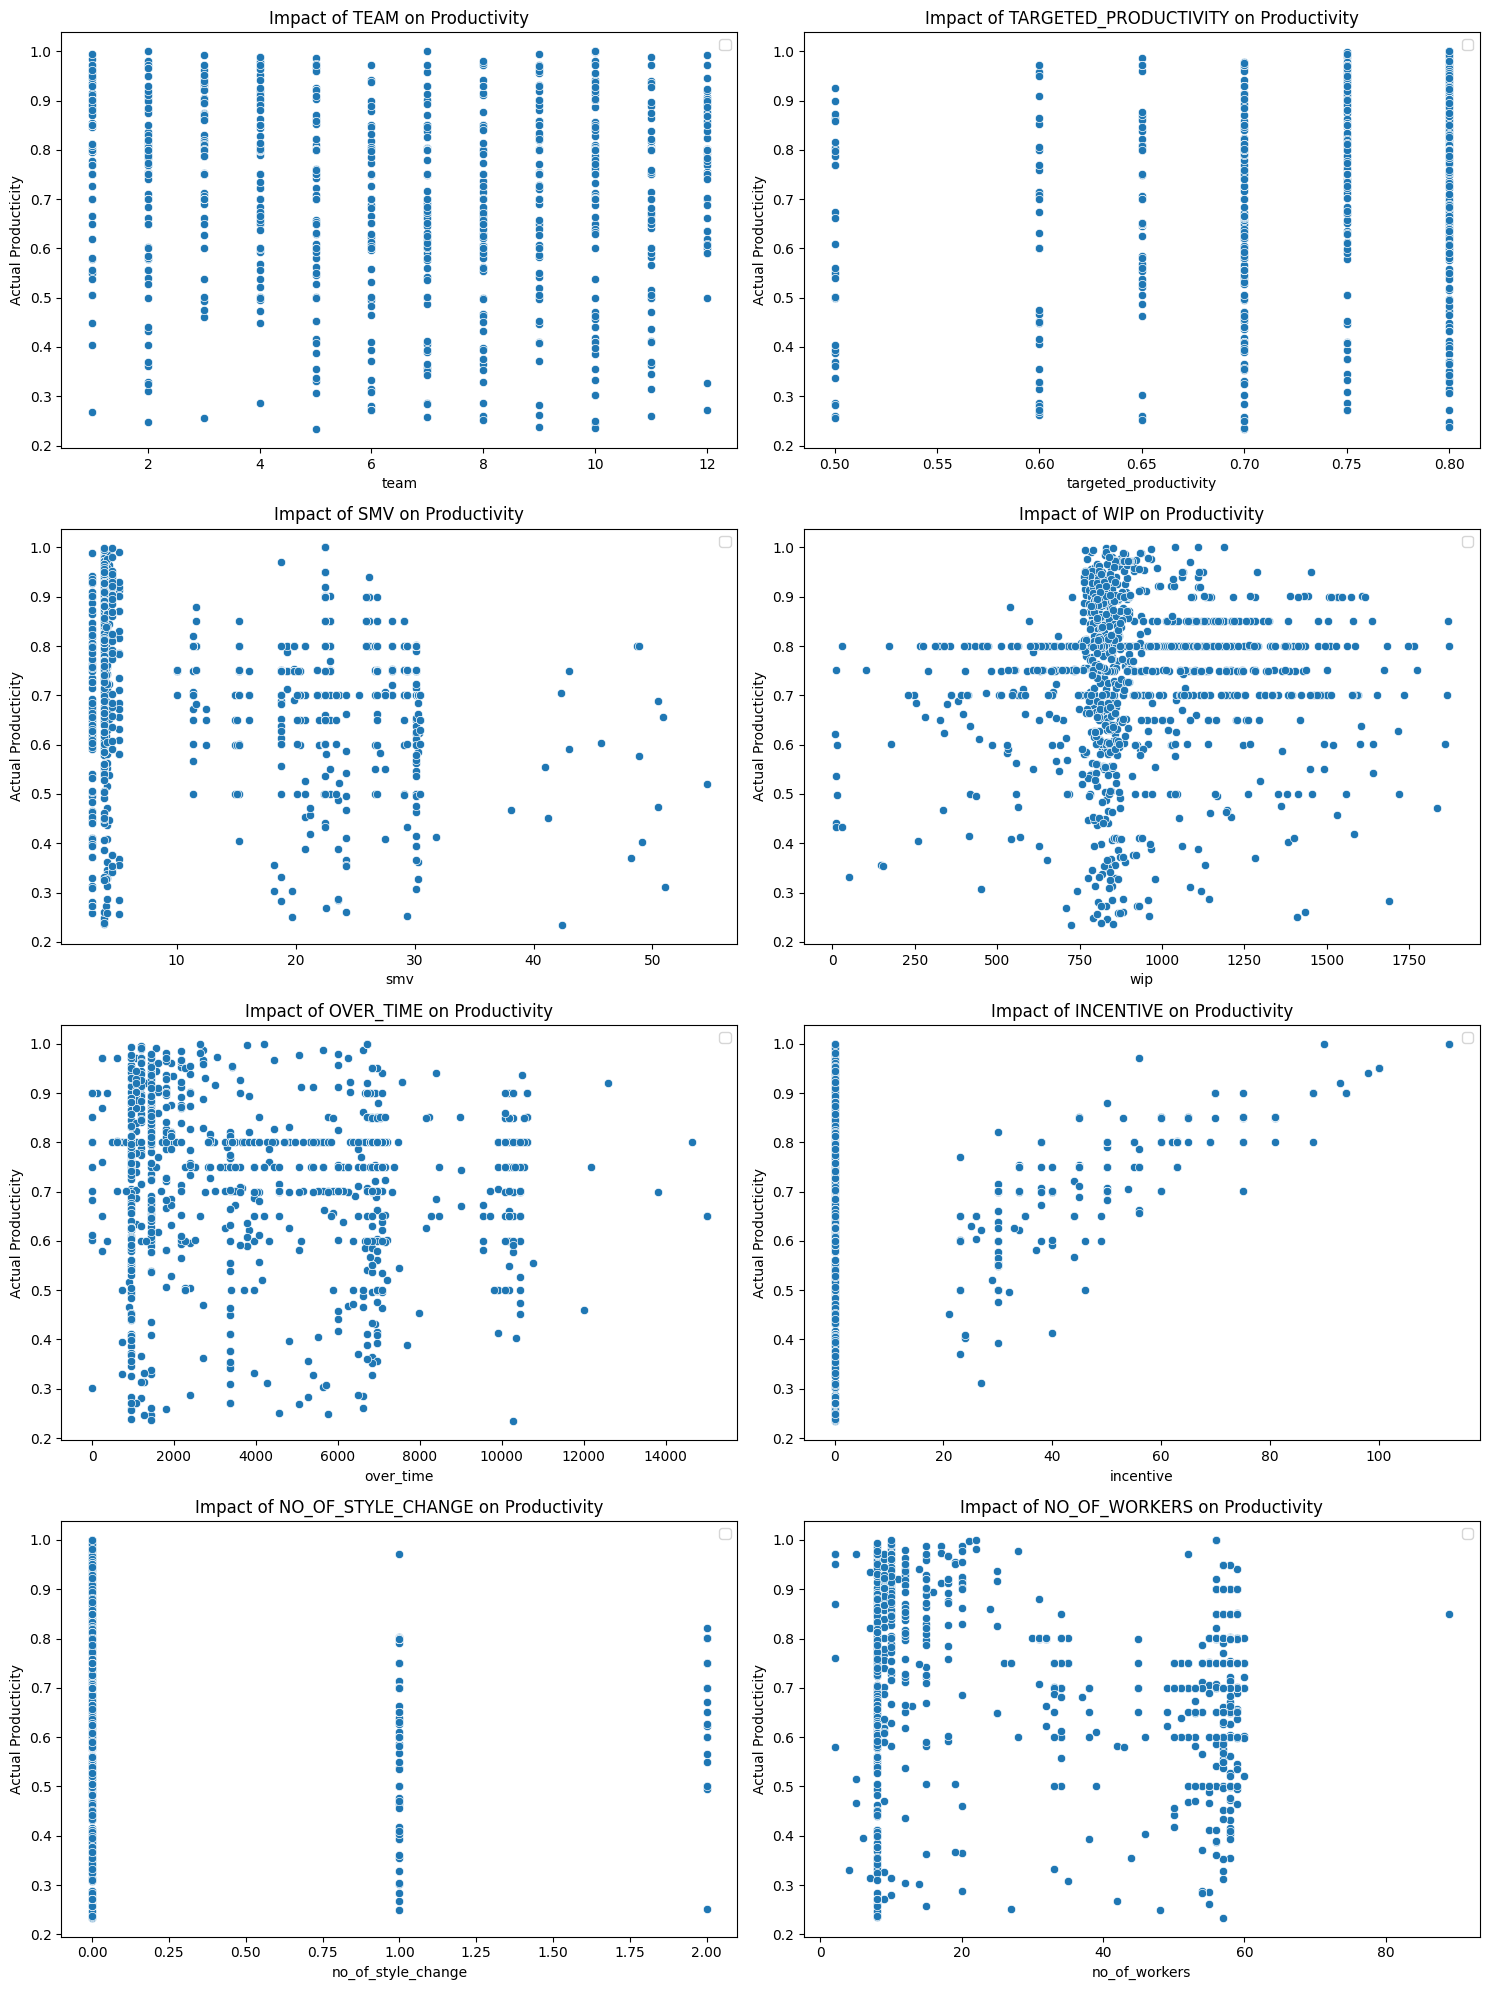

In [100]:
# create a numerical predictors
#num_cols.remove('actual_productivity')

# Create subplots with 2 columns
num_columns = 2
num_rows = (len(num_cols) + 1) // num_columns  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the columns and create a line plot for each
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.scatterplot(data=df, x=col, y='actual_productivity', ax=ax)
    ax.set_title(f"Impact of {str(col).upper()} on Productivity")
    ax.set_xlabel(col)
    ax.set_ylabel('Actual Producticity')
    ax.legend()

# Hide any unused subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### Targeted Producticity vs Actual Productivity

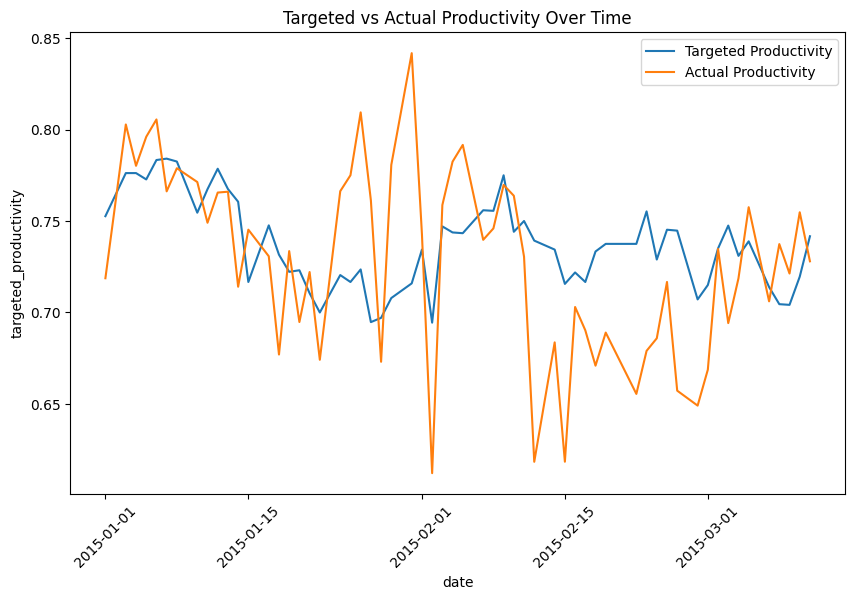

In [101]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='date', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity Over Time')
plt.legend()
plt.show()

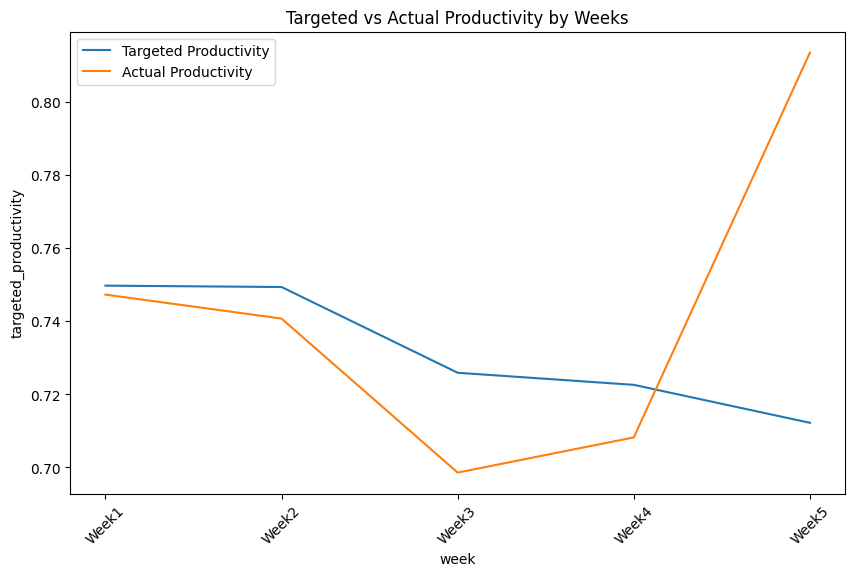

In [102]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='week', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity by Weeks')
plt.legend()
plt.show()

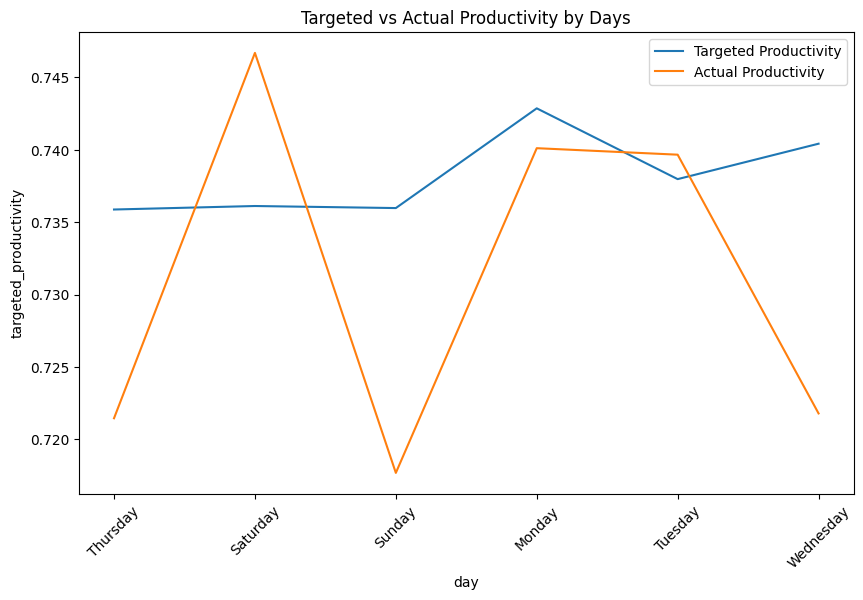

In [103]:
# Plot Targeted vs Actual Productivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='day', y='targeted_productivity', label='Targeted Productivity',ci=None)
sns.lineplot(data=df, x='day', y='actual_productivity', label='Actual Productivity', ci=None)
plt.xticks(rotation=45)
plt.title('Targeted vs Actual Productivity by Days')
plt.legend()
plt.show()

In [106]:
corr = df.corr(numeric_only=True).round(3)
corr.style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.073000,-0.103000,0.027000,-0.117000,0.013000,-0.018000,-0.065000,-0.099000
targeted_productivity,0.073000,1.000000,-0.096000,-0.094000,-0.076000,0.183000,-0.226000,-0.104000,0.411000
smv,-0.103000,-0.096000,1.000000,0.168000,0.689000,0.624000,0.317000,0.901000,-0.112000
wip,0.027000,-0.094000,0.168000,1.000000,0.340000,0.357000,-0.023000,0.269000,0.083000
over_time,-0.117000,-0.076000,0.689000,0.340000,1.000000,0.584000,0.057000,0.754000,-0.014000
incentive,0.013000,0.183000,0.624000,0.357000,0.584000,1.000000,0.036000,0.729000,0.271000
no_of_style_change,-0.018000,-0.226000,0.317000,-0.023000,0.057000,0.036000,1.000000,0.317000,-0.179000
no_of_workers,-0.065000,-0.104000,0.901000,0.269000,0.754000,0.729000,0.317000,1.000000,-0.022000
actual_productivity,-0.099000,0.411000,-0.112000,0.083000,-0.014000,0.271000,-0.179000,-0.022000,1.000000
